This jupyter notebook contains code to answer some questions about the GerLayQA Dataset used in my thesis.

In [22]:
import pandas as pd
df = pd.read_json("../data/GerLayQA.json", encoding='utf-8')

To get a better understanding of the structure of the dataset lets look at the first entry of the dataframe

In [23]:

df.head(1)


,Question_text,Answer_text,Paragraphs
0,Wir wohnen seit dem 01.11.2021 zur Miete in ei...,"Sehr geehrter Ratsuchender, vielen Dank für...",[§ 573]


Lets now look at the distribution and average number of tagged paragraphs in the Paragraphs column.

4


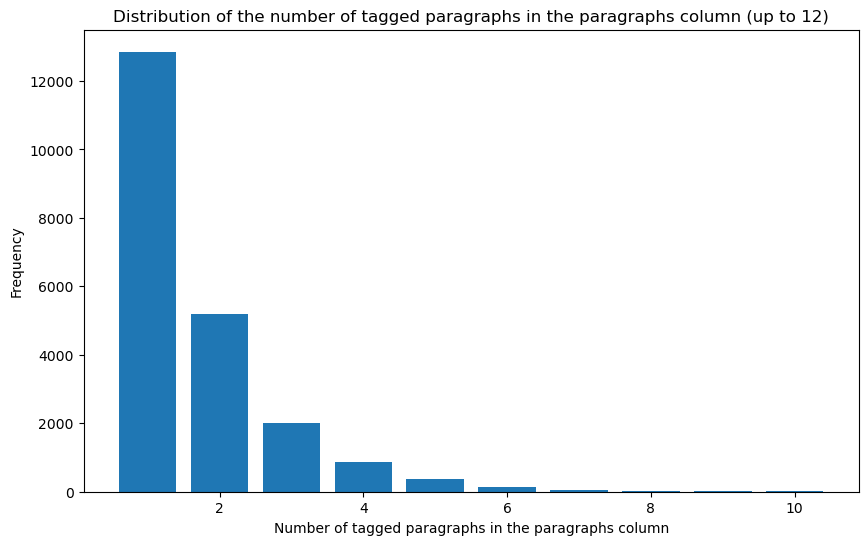

In [24]:
import matplotlib.pyplot as plt

# Calculate the number of paragraphs for each entry and filter out values above 10
paragraph_lengths = df['Paragraphs'].apply(lambda x: len(x))
filtered_paragraph_lengths = paragraph_lengths[paragraph_lengths <= 10]
print(len(paragraph_lengths[paragraph_lengths > 10]))
# Calculate the frequency distribution for paragraph lengths 10 or less
frequency_distribution = filtered_paragraph_lengths.value_counts().sort_index()

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values)

# Add titles and labels
plt.title('Distribution of the number of tagged paragraphs in the paragraphs column (up to 12)')
plt.xlabel('Number of tagged paragraphs in the paragraphs column')
plt.ylabel('Frequency')
plt.grid(visible=False)

# Save the figure
plt.savefig("tagged_paragraph_distribution.pdf", bbox_inches='tight')

# Display the plot
plt.show()

In [25]:
#Print out average length of the paragraphs column
df['Paragraphs'].apply(lambda x: len(x)).mean()

1.6851146810288793

Lets now look at the average amount of token and distribution of the token count in the Question_text column.

11


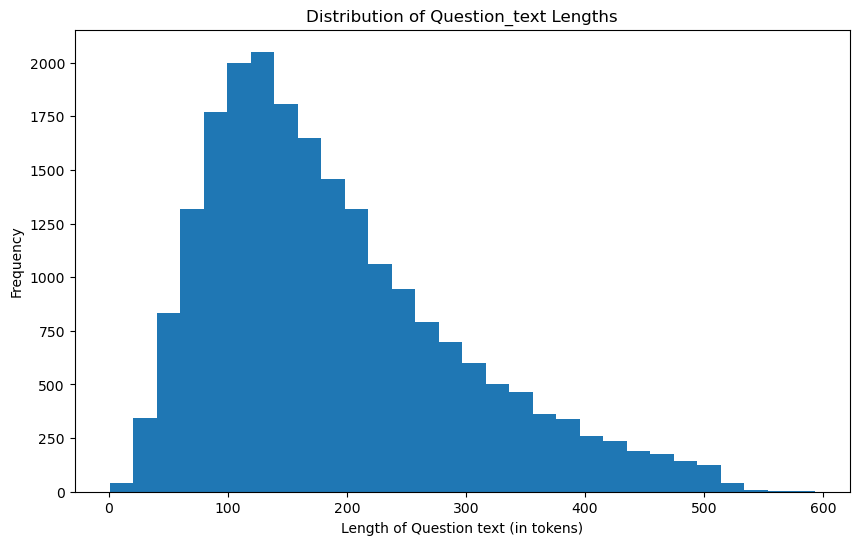

In [26]:
import matplotlib.pyplot as plt

# Calculate the length of each entry in the Question_Text column
question_lengths = df['Question_text'].apply(lambda x: len(x.split(" ")))

# Filter out lengths greater than 600 tokens(rare case 11 entries)
filtered_question_lengths = question_lengths[question_lengths <= 600]
print(len(question_lengths[question_lengths > 600]))
# Plot the distribution as a histogram
plt.figure(figsize=(10, 6))
filtered_question_lengths.hist(bins=30)

# Add titles and labels
plt.title('Distribution of Question_text Lengths')
plt.xlabel('Length of Question text (in tokens)')
plt.ylabel('Frequency')
plt.grid(visible=False)

# Save the figure
plt.savefig("question_text_length_distribution.pdf", bbox_inches='tight')

# Display the plot
plt.show()

In [27]:
#Print out the average length in Question_text column
df['Question_text'].apply(lambda x: len(x.split(" "))).mean()

189.5960627727737

Lastly, while not directly relevant to the task at hand, lets look at the distribution and average of the amounts of token in the Answer_text column.

32


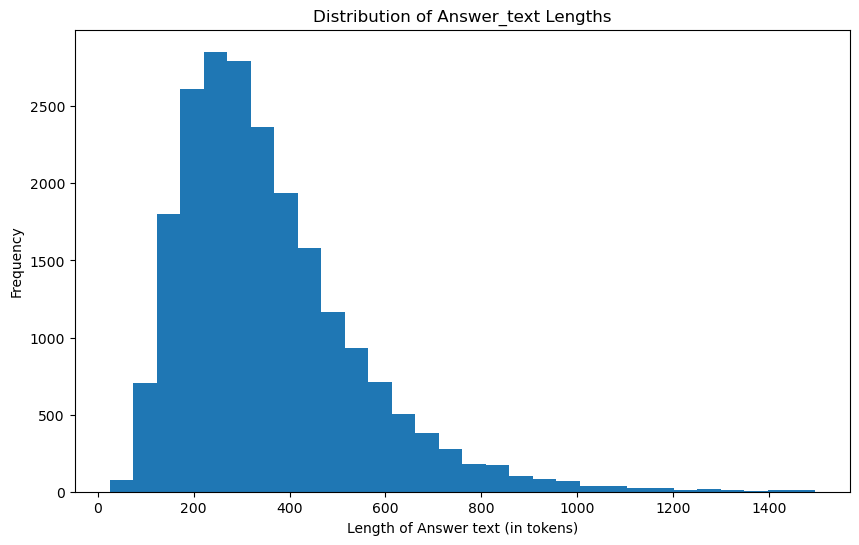

In [28]:
import matplotlib.pyplot as plt

# Calculate the length of each entry in the Answer_text column
answer_lengths = df['Answer_text'].apply(lambda x:len(x.split(" ")))

# Filter out lengths greater than 1500 tokens(only rare cases; 32 entries)
filtered_answer_lengths = answer_lengths[answer_lengths <= 1500]
print(len(answer_lengths[answer_lengths > 1500]))
# Plot the distribution as a histogram
plt.figure(figsize=(10, 6))
filtered_answer_lengths.hist(bins=30)

# Add titles and labels
plt.title('Distribution of Answer_text Lengths')
plt.xlabel('Length of Answer text (in tokens)')
plt.ylabel('Frequency')
plt.grid(visible=False)

# Save the figure
plt.savefig("answer_text_length_distribution.pdf", bbox_inches='tight')

# Display the plot
plt.show()

In [29]:
#Print out the average length in Answer_text column
df['Answer_text'].apply(lambda x: len(x.split(" "))).mean()

360.6591141238741

Now as in the Thesis Section 6.2.1. described, some statistics and examples for the attempted link between the Law Data and the Court Precedent Data.

In [ ]:
import re  # Importing the 're' module to use regular expressions for pattern matching.

def extract_case_references(text):
    """
    This function takes a string of text as input and extracts references to legal cases 
    based on certain predefined patterns. It returns a list of unique case references.
    """

    # Define a list of regular expression patterns that are used to identify case references.
    patterns = [
        # Pattern 1: Matches phrases like "vergleichbare Urteile", "ähnliche Fälle", or "relevante Entscheidungen",
        # possibly followed by a colon or equal sign, and then the case references (words, spaces, commas, hyphens, parentheses).
        r'(vergleichbare\s+Urteile|ähnliche\s+Fälle|relevante\s+Entscheidungen)\s*[:=]?\s*([\w\s,\-\(\)]+)',

        # Pattern 2: Matches phrases like "Siehe auch" or "Vgl." followed by the case references.
        r'(Siehe\s+auch|Vgl\.)\s*([\w\s,\-\(\)]+)',

        # Pattern 3: Matches case references followed by phrases indicating the case was decided in similar instances.
        r'([\w\s,\-\(\)]+)\s*(wurde\s+in\s+ähnlichen\s+Fällen\s+entschieden)',

        # Pattern 4: Matches case references followed by phrases indicating it is a comparable judgment.
        r'([\w\s,\-\(\)]+)\s*(ist\s+ein\s+vergleichbares\s+Urteil)'
    ]

    case_references = []  # Initialize an empty list to store extracted case references.

    # Loop through each pattern in the list of patterns.
    for pattern in patterns:
        # Use 're.findall' to find all matches of the current pattern in the input text.
        # The re.IGNORECASE flag ensures the pattern matching is case-insensitive.
        matches = re.findall(pattern, text, re.IGNORECASE)
        
        # Iterate over the matches found by the pattern.
        for match in matches:
            # Join the matched groups into a single string, removing any surrounding whitespace.
            case_ref = ''.join(match).strip()
            
            # If the resulting case reference string is not empty, add it to the list of case references.
            if case_ref:
                case_references.append(case_ref)

    # Remove any duplicate case references by converting the list to a set, then back to a list.
    return list(set(case_references))


In [11]:
#Extract case references from the Answer_text column
answer_texts = df['Answer_text']
case_references = answer_texts.apply(extract_case_references)

In [ ]:
filtered_case_references = case_references[case_references.apply(len) > 0]

15                                        [vgl.etwa, vgl.]
33                          [Vgl.BayObLG, Beschluß vom 19]
36                                                  [vgl.]
40                 [vgl.BGH DNotZ 2007, 513, vgl.BGH, Urt]
46        [vgl.BFH-Urteile in BFH, vgl.BFH-Urteile vom 28]
                               ...                        
21507                                [vgl.MünchKomm, BGB,]
21513    [vgl.Löwisch, Die Änderung von Arbeitsbedingun...
21524                                         [vgl.a href]
21527                              [vgl.BGH, Urteil vom 5]
21528                                       [vgl.Baumbach]
Name: Answer_text, Length: 2491, dtype: object

In [ ]:
# Print the number of entries with case references
print(len(filtered_case_references))

21402    [Vgl.die Entscheidung des Bundesarbeitsgericht...
4299     [Vgl.dazu, Vgl.hierzu Mitteilung der Presseste...
20118                             [vgl.BayObLG NJW 1988 S]
13768                              [vgl.auch Sternel, Abs]
16889        [vgl.Palandt BGB 66, vgl.Tröndle, vgl.a href]
10707              [Vgl.Bundesgerichtshof, Urteile vom 03]
10575                             [vgl.BGH, Urteil vom 19]
16561                               [vgl.OLG Hamm, a href]
9198                                  [vgl.LG München Abs]
17738                            [vgl.Palandt, BGB, 2007,]
Name: Answer_text, dtype: object

In [ ]:
# Display a random sample of case references
filtered_case_references.sample(5)